In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df =pd.read_csv('Income Data.csv')

In [3]:
df.head()

,income,age
0,41100.0,48.75
1,54100.0,28.10
2,47800.0,46.75
3,19100.0,40.25
4,18200.0,35.80


In [4]:
df.shape

(300, 2)

In [5]:
df.isna().sum()

income    0
age       0
dtype: int64

In [6]:
df[df.duplicated()]# there are two duplicates.


,income,age
220,47300.0,43.3
258,48600.0,46.2


In [7]:
#df = df.drop_duplicates(inplace =True)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   income  300 non-null    float64
 1   age     300 non-null    float64
dtypes: float64(2)
memory usage: 4.8 KB


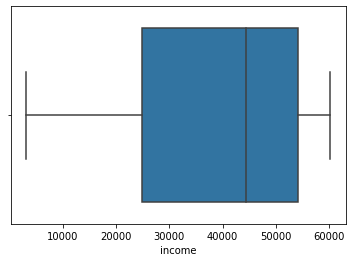

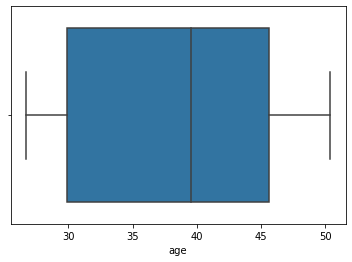

In [9]:
for i in df.select_dtypes(include=['int64','float64']):
    sns.boxplot(df[i])
    plt.show()

# no outiers in the dataset

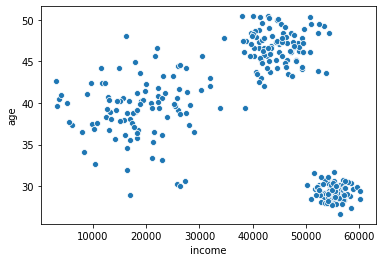

In [10]:
sns.scatterplot(df.income,df.age)

In [11]:
from sklearn.cluster import KMeans
kmeans = KMeans()
kmeans.fit(df)
kmeans.cluster_centers_
kmeans.inertia_

911717093.9099052

In [12]:
cluster_range = range( 1, 15 )
cluster_errors = []
for num_clusters in cluster_range:
  clusters = KMeans( num_clusters )#, n_init = 10
  clusters.fit(df)
  labels = clusters.labels_
  centroids = clusters.cluster_centers_
  cluster_errors.append( clusters.inertia_ )
clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": cluster_errors } )
clusters_df#[0:15]

,num_clusters,cluster_errors
0,1,7.749624e+10
1,2,1.259895e+10
2,3,6.107696e+09
3,4,3.093566e+09
4,5,2.202337e+09
5,6,1.468601e+09
6,7,1.181285e+09
7,8,9.187841e+08
8,9,7.251066e+08
9,10,5.986695e+08


In [13]:
clusters_df.sort_values(by ='cluster_errors')

,num_clusters,cluster_errors
13,14,2.688558e+08
12,13,3.263335e+08
11,12,3.842181e+08
10,11,4.654563e+08
9,10,5.986695e+08
8,9,7.251066e+08
7,8,9.187841e+08
6,7,1.181285e+09
5,6,1.468601e+09
4,5,2.202337e+09


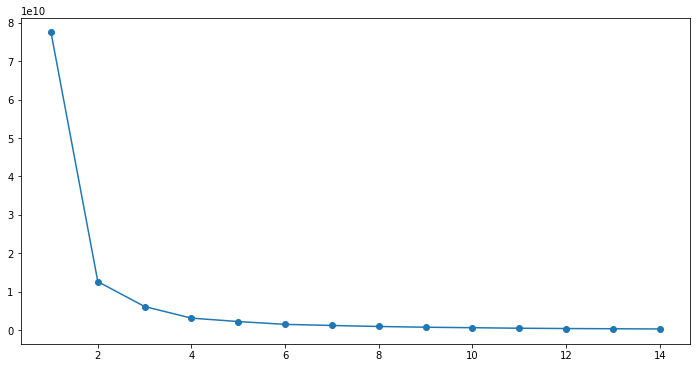

In [14]:
# Elbow plot

plt.figure(figsize=(12,6))
plt.plot( clusters_df.num_clusters, clusters_df.cluster_errors, marker = "o" )

so from the elbow curve , we can see that there can be 3or 4 clusters, but from the scatter plot we can observe 3 diff clusters.

In [15]:
kmeansa = KMeans(n_clusters= 4)
kmeansa.fit(df)
print('inertia',kmeansa.inertia_)
print('centroids',kmeansa.cluster_centers_)
dflabel =pd.DataFrame(kmeansa.labels_)

inertia 3093566239.1138315
centroids [[5.46756522e+04 3.17004348e+01]
 [1.34381818e+04 3.88618182e+01]
 [4.34209302e+04 4.65906977e+01]
 [2.50090909e+04 3.97238636e+01]]


In [16]:
dflabel.rename(columns={0:'labels1'},inplace =True)

In [17]:
dflabel

,labels1
0,2
1,0
2,2
3,1
4,1
...,...
295,2
296,3
297,0
298,2


In [18]:
df =df.join(dflabel)

In [19]:
df.isna().sum()

income     0
age        0
labels1    0
dtype: int64

In [20]:
df.shape

(300, 3)

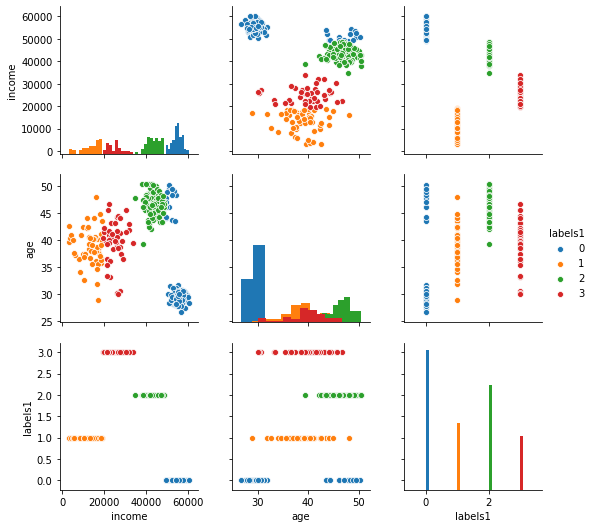

In [21]:
sns.pairplot(df,diag_kind='hist',hue ='labels1')

## now do the zscore

In [22]:
df =pd.read_csv('Income Data.csv')

In [23]:
from scipy.stats import zscore
df1 =zscore(df)

In [24]:
df1 =pd.DataFrame(df1)

In [25]:
from sklearn.cluster import KMeans
kmeans = KMeans()
kmeans.fit(df1)
kmeans.cluster_centers_
kmeans.inertia_

22.50628866540363

In [26]:
cluster_range = range( 1, 15 )
cluster_errors = []
for num_clusters in cluster_range:
  clusters = KMeans( num_clusters )#, n_init = 10
  clusters.fit(df1)
  labels = clusters.labels_
  centroids = clusters.cluster_centers_
  cluster_errors.append( clusters.inertia_ )
clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": cluster_errors } )
clusters_df#[0:15]

,num_clusters,cluster_errors
0,1,600.000000
1,2,238.534375
2,3,58.301209
3,4,42.905894
4,5,33.857393
5,6,28.849987
6,7,25.811072
7,8,22.457953
8,9,19.562751
9,10,17.726491


In [27]:
clusters_df.sort_values(by ='cluster_errors')

,num_clusters,cluster_errors
13,14,13.037697
12,13,13.787196
11,12,15.085873
10,11,16.461694
9,10,17.726491
8,9,19.562751
7,8,22.457953
6,7,25.811072
5,6,28.849987
4,5,33.857393


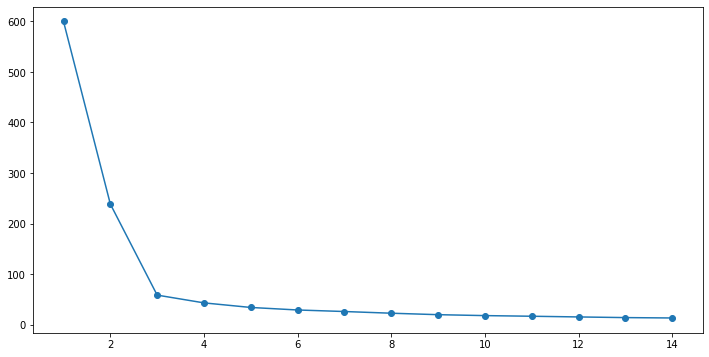

In [28]:
# Elbow plot

plt.figure(figsize=(12,6))
plt.plot( clusters_df.num_clusters, clusters_df.cluster_errors, marker = "o" )

so from the elbow curve , we can see that there can be 5 clusters, but from the scatter plot we can observe 3 diff clusters.

In [29]:
kmeansa = KMeans(n_clusters= 3)
kmeansa.fit(df1)
print('inertia',kmeansa.inertia_)
print('centroids',kmeansa.cluster_centers_)
dflabel =pd.DataFrame(kmeansa.labels_)

inertia 58.30120949883502
centroids [[ 0.29682871  1.08753708]
 [ 0.97471684 -1.20817959]
 [-1.32005197  0.09073855]]


In [30]:
dflabel.rename(columns={0:'labels1'},inplace =True)

In [31]:
dflabel

,labels1
0,0
1,1
2,0
3,2
4,2
...,...
295,0
296,2
297,1
298,0


In [32]:
df1

,0,1
0,0.097185,1.370164
1,0.906027,-1.379128
2,0.514050,1.103888
3,-1.271624,0.238494
4,-1.327621,-0.353969
...,...,...
295,-0.077027,1.017349
296,-0.755210,0.757731
297,0.912249,-1.359158
298,0.140739,0.850927


In [33]:
df1 =df1.join(dflabel)

In [34]:
df1.isna().sum()

0          0
1          0
labels1    0
dtype: int64

In [35]:
df1.shape

(300, 3)

In [36]:
df1.head()

,0,1,labels1
0,0.097185,1.370164,0
1,0.906027,-1.379128,1
2,0.514050,1.103888,0
3,-1.271624,0.238494,2
4,-1.327621,-0.353969,2


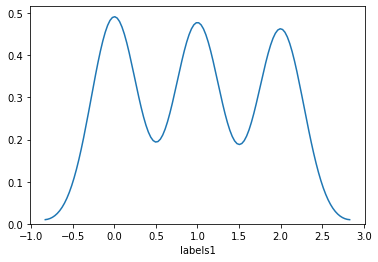

In [37]:
sns.distplot(df1["labels1"],hist =False)

In [38]:
df1.head()

,0,1,labels1
0,0.097185,1.370164,0
1,0.906027,-1.379128,1
2,0.514050,1.103888,0
3,-1.271624,0.238494,2
4,-1.327621,-0.353969,2


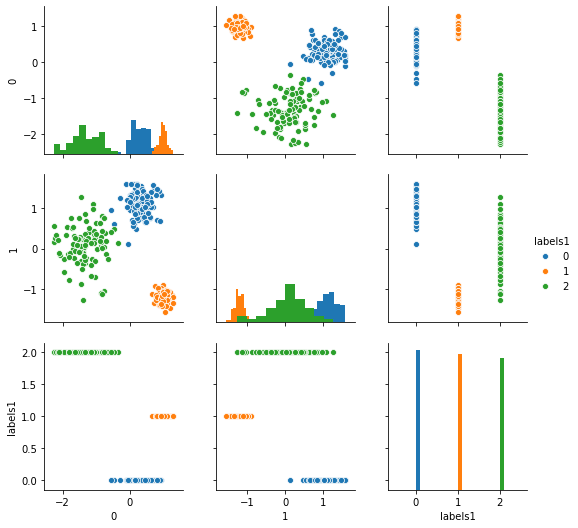

In [39]:
sns.pairplot(df1,diag_kind='hist',hue ='labels1')

In [40]:
df1.labels1.value_counts()

0    103
1    100
2     97
Name: labels1, dtype: int64

## Agglomerative clustering

In [41]:
dfagg =pd.read_csv('Income Data.csv')

In [42]:
dfaggsca = zscore(dfagg)
dfaggsca =pd.DataFrame(dfaggsca,columns= ['Income','Age'])
dfaggsca.head()

,Income,Age
0,0.097185,1.370164
1,0.906027,-1.379128
2,0.514050,1.103888
3,-1.271624,0.238494
4,-1.327621,-0.353969


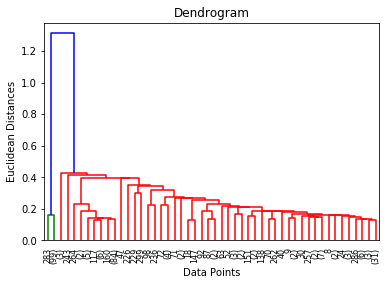

In [43]:

from scipy.cluster.hierarchy import linkage, dendrogram
z = linkage(dfaggsca, method='single')#
dendrogram(z,truncate_mode='lastp',p =50)
plt.title('Dendrogram')
plt.xlabel('Data Points')
plt.ylabel('Euclidean Distances')
plt.show()


Automatically created module for IPython interactive environment
For n_clusters = 2 The average silhouette_score is : 0.7049787496083262


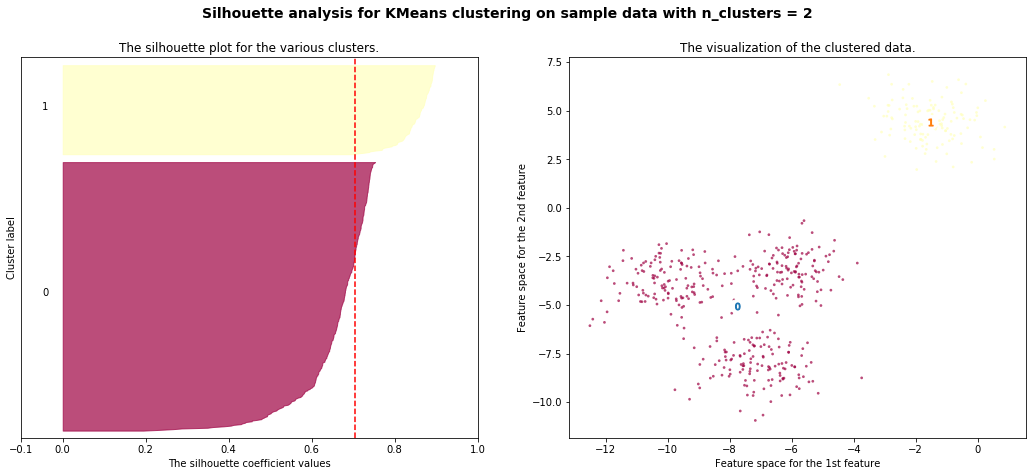

For n_clusters = 3 The average silhouette_score is : 0.5882004012129721


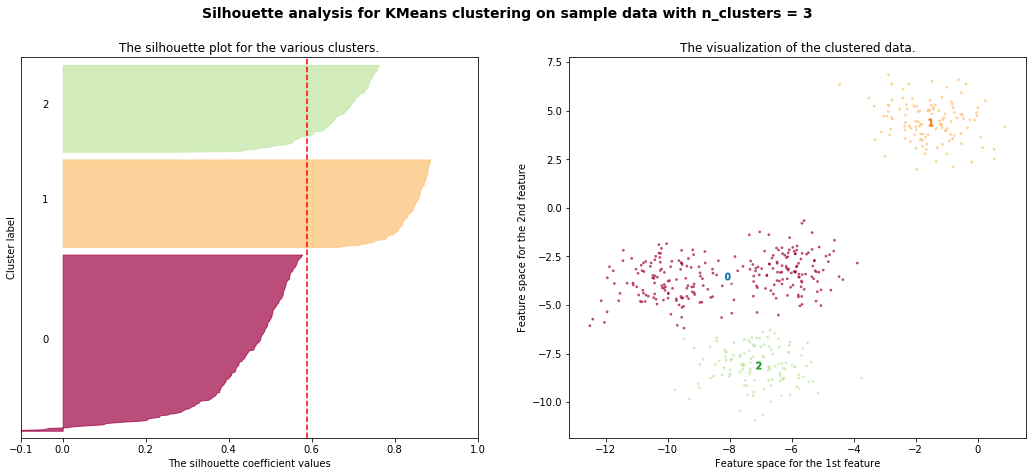

For n_clusters = 4 The average silhouette_score is : 0.6505186632729437


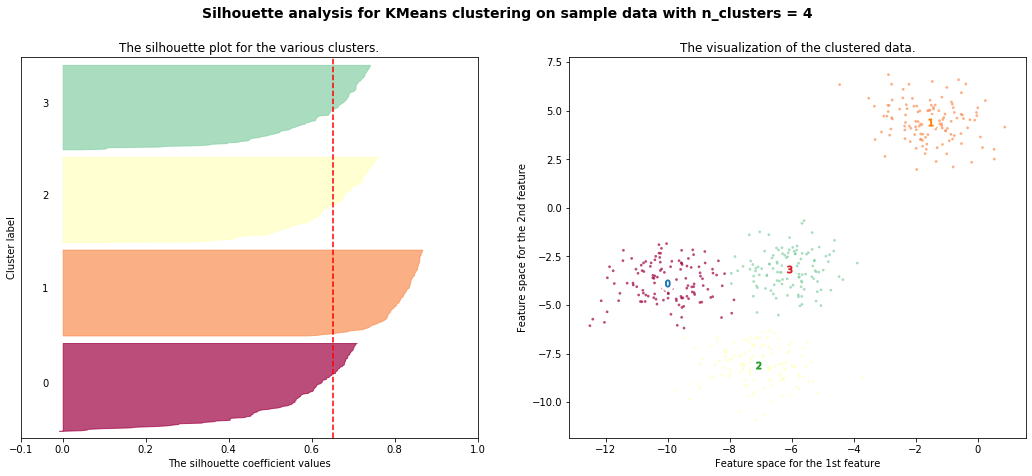

For n_clusters = 5 The average silhouette_score is : 0.5745566973301872


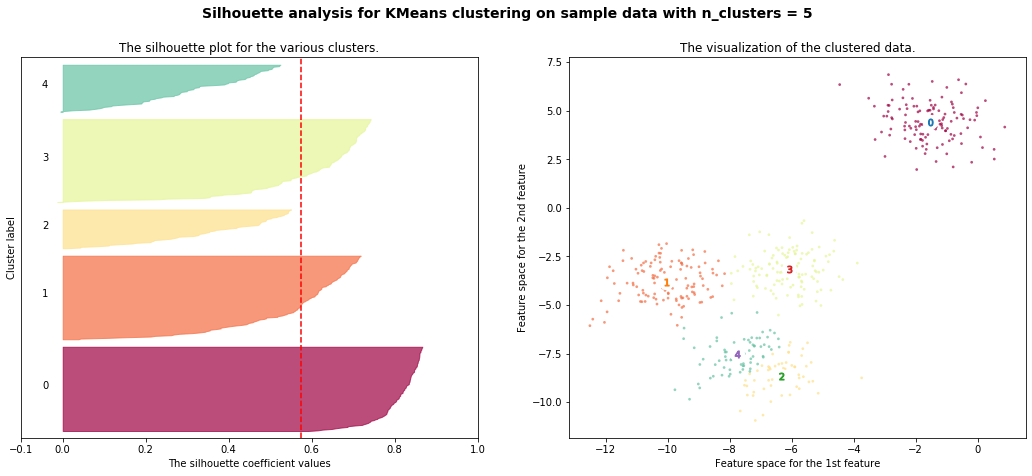

For n_clusters = 6 The average silhouette_score is : 0.43902711183132426


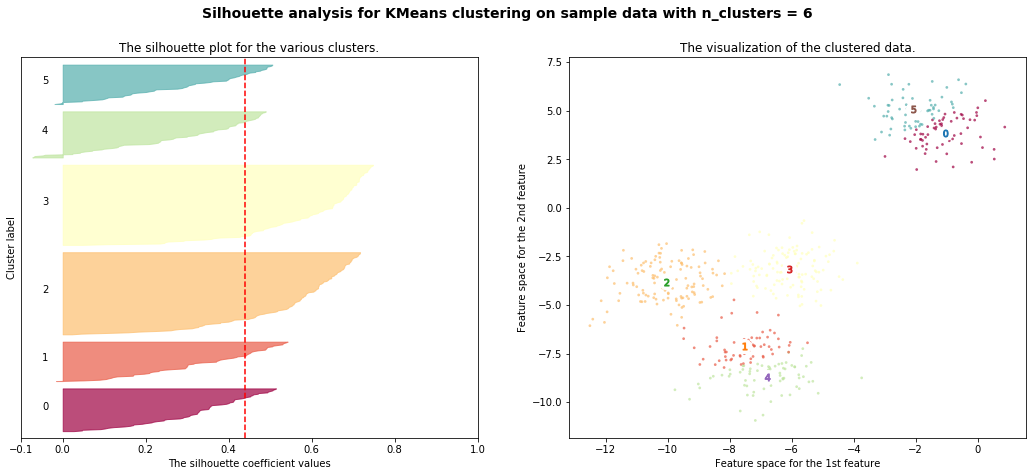

In [44]:
from __future__ import print_function
%matplotlib inline


from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

print(__doc__)

# Generating the sample data from make_blobs
# This particular setting has one distinct cluster and 3 clusters placed close
# together.
X, y = make_blobs(n_samples=500,
                  n_features=2,
                  centers=4,
                  cluster_std=1,
                  center_box=(-10.0, 10.0),
                  shuffle=True,
                  random_state=1)  # For reproducibility

range_n_clusters = [2, 3, 4, 5, 6]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.Spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.Spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors)

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1],
                marker='o', c="white", alpha=1, s=200)

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1, s=50)

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

    plt.show()

In [45]:
from sklearn.cluster import AgglomerativeClustering
agg =AgglomerativeClustering()

In [46]:
agg.fit(dfagg)

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='ward', memory=None, n_clusters=2)

In [47]:
dflab =pd.DataFrame(agg.labels_)

In [48]:
dfagg =dfagg.join(dflab)

In [49]:
dfagg.rename(columns={0:'labels'},inplace =True)

In [50]:
dfagg

,income,age,labels
0,41100.0,48.75,0
1,54100.0,28.10,0
2,47800.0,46.75,0
3,19100.0,40.25,1
4,18200.0,35.80,1
...,...,...,...
295,38300.0,46.10,0
296,27400.0,44.15,1
297,54200.0,28.25,0
298,41800.0,44.85,0


In [51]:
dfagg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   income  300 non-null    float64
 1   age     300 non-null    float64
 2   labels  300 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 7.2 KB


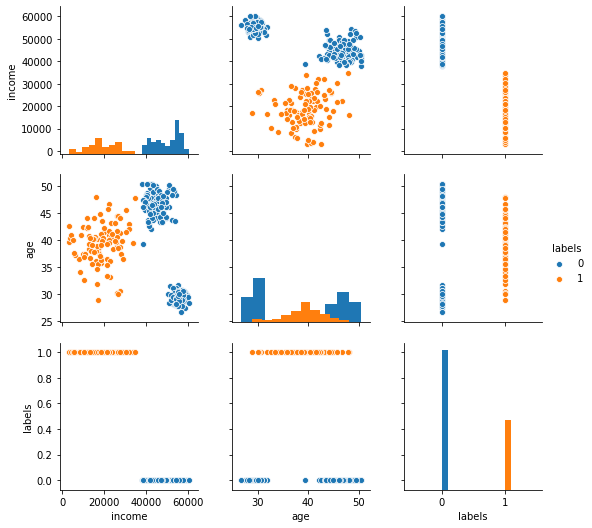

In [52]:
sns.pairplot(dfagg,diag_kind='hist', hue = 'labels')

## Apply PCA

In [53]:
dfagg.head()

,income,age,labels
0,41100.0,48.75,0
1,54100.0,28.10,0
2,47800.0,46.75,0
3,19100.0,40.25,1
4,18200.0,35.80,1


In [67]:
x = dfagg.drop(columns='labels')
y = dfagg['labels']

#Normalize the data

In [68]:
from sklearn.preprocessing import StandardScaler
st =StandardScaler()
xscaled =st.fit_transform(x)


# covariance matrix

In [69]:
cov_matrix = np.cov(xscaled.T)
print('Covariance Matrix \n%s', cov_matrix)
plt.tight_layout()

Covariance Matrix 
%s [[ 1.00334448 -0.31752057]
 [-0.31752057  1.00334448]]


<Figure size 432x288 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

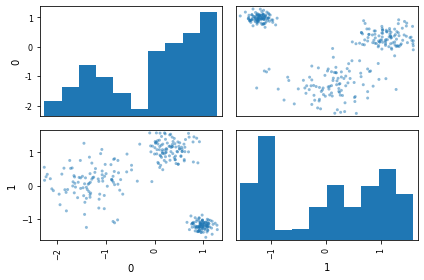

In [70]:
dffpiar =pd.DataFrame(xscaled)
plt.figure(figsize=(20,8))
axes =pd.plotting.scatter_matrix(dffpiar)
plt.tight_layout()

# Step 3: Calculate the eigenvalues and eigenvectors

In [71]:
eig_val ,eigvect = np.linalg.eig(cov_matrix)

In [72]:
print('Eigen Vectors \n%s', eig_val)
print('\n Eigen Values \n%s', eigvect)

Eigen Vectors 
%s [1.32086506 0.68582391]

 Eigen Values 
%s [[ 0.70710678  0.70710678]
 [-0.70710678  0.70710678]]


# variance

In [73]:
tot = sum(eig_val)
var_exp = [( i /tot ) * 100 for i in sorted(eig_val, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
print("Cumulative Variance Explained", cum_var_exp)

Cumulative Variance Explained [ 65.82310859 100.        ]


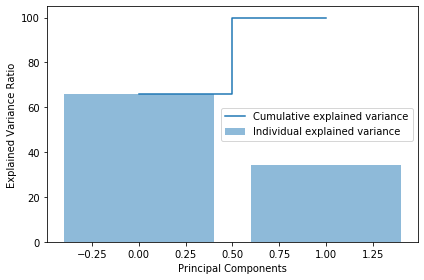

In [75]:
plt.figure(figsize=(6 , 4))
plt.bar(range(2), var_exp, alpha = 0.5, align = 'center', label = 'Individual explained variance')
plt.step(range(2), cum_var_exp, where='mid', label = 'Cumulative explained variance')
plt.ylabel('Explained Variance Ratio')
plt.xlabel('Principal Components')
plt.legend(loc = 'best')
plt.tight_layout()
plt.show()

In [79]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(xscaled, y, test_size=0.33, random_state=42)

In [80]:
from sklearn.decomposition import PCA

pca =PCA()
xtrainpca = pca.fit_transform(X_train)
xtestpca = pca.transform(X_test)

# apply unsupervised or supervised learning